# Creation and Exploration of graphs: 
# Erdos-Renyi-graph and Barabasi-Albert-graph

Author: Paula Pérez Bianchi

In this Notebook we will explore Erdos-Renyi graphs and Barabasi graphs

Import libraries 

In [234]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
import numpy as np
import pandas as pd
sns.set_theme(style="whitegrid")

## Create an Erdos-Renyi-graph

In an Erdos-renyi-graph $ G_{n,p}$ each edge has a fixed probability $p$ of being present or absent independently of the other edges. 

So in an undirected graph of $n$ nodes we can have at most $\frac{n(n-1)}{2}$ edges and for every edge we choose with probability $p$ if we include it or not. That means that the amount of edges will around to $\frac{n(n-1)}{2} * p $.


These types of graphs are interesting because they have special properties. For example, finding the size of the largest Clique in a graph is NP-Complete but for this type of graph this problem is very well understood.

#### Create an Erdos-Renyi-graph of 100 nodes and $p$ = 0.3

In [210]:
n = 100 #number of nodes 
p = 0.3 #probability p 
seed = 20161 # Use seed for reproducibility
G1 = nx.erdos_renyi_graph(n, p, seed)

Check if the amount of edges is around $\frac{n(n-1)}{2} * p $

In [211]:
print(G1.number_of_edges())
print((n*(n-1))*p/2)

1494
1485.0


Let's plot the graph. Because it has so many nodes and edges we can't see the much but we can observe that the graph looks dense.

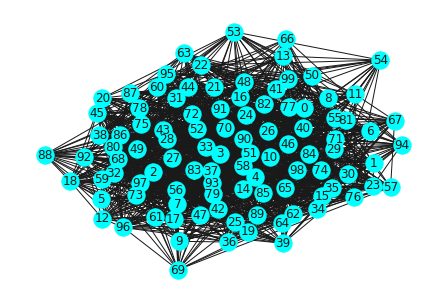

In [358]:
nx.draw(G1, pos=nx.spring_layout(G1), with_labels=True, node_color = "cyan")

One interesting thing is to analyze what the degree centrality distribution looks like. We can see that in a histogram.

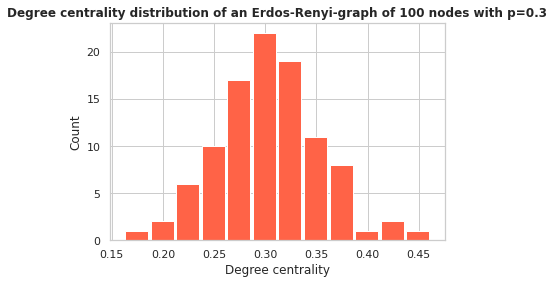

In [218]:
degree_centrality_G1 = nx.degree_centrality(G1) 

sns.histplot(degree_centrality_G1,  shrink=.9, color = "tomato",binwidth=0.025, alpha = 1)
plt.xlabel("Degree centrality")
plt.title("Degree centrality distribution of an Erdos-Renyi-graph of 100 nodes with p=0.3", weight = "bold")
plt.show()

Well, it looks like the degree centrality is a binomial distribution. So let's plot a binomial distribution with $p = 0.3$ and see the similarities. 

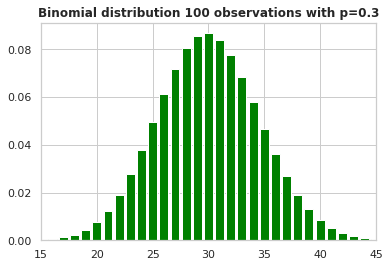

In [121]:
# defining list of r values
r_values = list(range(n + 1))
# list of pmf values from a binomial distribution
dist = [binom.pmf(r, n, p) for r in r_values ]
# plotting the graph 
plt.bar(r_values,dist, color = "green")
plt.title("Binomial distribution 100 observations with p=0.3", weight = "bold")
plt.xlim(15, 45)
plt.show()

Both graphs are similar. We can observe that the first distribution is centered around $p$ which is what we would expect because the degree centrality is normalized. Also as we already observed the amount of edges is around $\frac{n(n-1)}{2} * p $ which is the mean of a binomial distribution. 


We can see the similarity between the 2 plots. The first histogram is centered around 0.3 which is what we would expect from a binomial distribution because that's the value of $p$ and degree_centrality is normalized. 

Let's see what happens when we increase $p$

#### Create an Erdos-Renyi-graph of 100 nodes and $p$ = 0.6

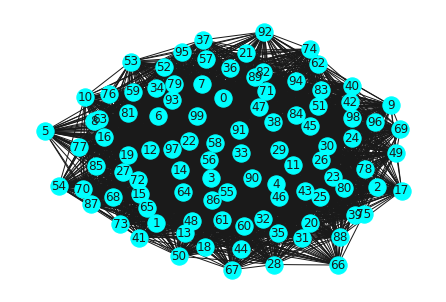

In [359]:
n = 100 #number of nodes 
p = 0.6 #probability p 
G2 = nx.erdos_renyi_graph(n, p, seed)

nx.draw(G2, pos=nx.spring_layout(G2), with_labels=True, node_color = "cyan")

Check if the amount of edges is around $\frac{n(n-1)}{2} * p $

In [223]:
print(G2.number_of_edges())
print((n*(n-1))*p/2)

2997
2970.0


Now let's plot the degree centrality of this graph.

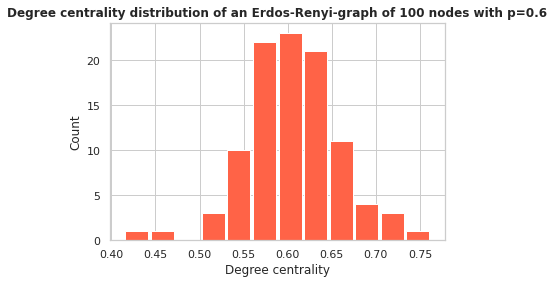

In [216]:
degree_centrality_G2 = nx.degree_centrality(G2)

sns.histplot(degree_centrality_G2,  shrink=.9, color = "tomato", binwidth=0.029, alpha = 1)
plt.xlabel("Degree centrality")
plt.title("Degree centrality distribution of an Erdos-Renyi-graph of 100 nodes with p=0.6", weight = "bold")
plt.show()

Once again we can see that the plot is similar to a binomial distribution. But now the plot is centered around $p = 0.6$ which is expected because that is the mean value. 

To compare both graphs $G_{100 ,  0.3}$ and $G_{100 ,  0.6 }$ let's plot the density of both distributions.
Here we can see that both degree centrality distributions are similar in shape but are centered at different points. 

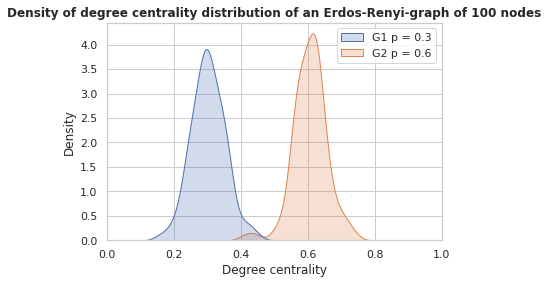

In [351]:
#create a data_frame whith the degree_centrality of G1 and G2
dataframe = pd.DataFrame()
data_plot1 = [degree_centrality_G1[i] for i in degree_centrality_G1]
data_plot2 = [degree_centrality_G2[i] for i in degree_centrality_G2]
dataframe['G1 p = 0.3']= data_plot1
dataframe['G2 p = 0.6']= data_plot2
#Plot the density of both distributions 
sns.kdeplot(dataframe, fill=True, color="r")
plt.title("Density of degree centrality distribution of an Erdos-Renyi-graph of 100 nodes", weight = "bold")
plt.xlabel("Degree centrality")
plt.xlim(0, 1)
plt.show()

### Conclusion
Finally, we could observe that Erdos-renyi-graphs degree-centrality distributions are binomials. 

In terms of the graph itself we can see that if we increase $p$ then the graph have more edges wich means that it is more dense and is more probable that it is connected. 

## Barabasi-Albert-graph

A Barabasi-Albert-graph of $n$ nodes is grown by attaching new nodes each with $m$ edges that are preferentially attached to existing nodes with high degree. These graphs are scale-free networks built with the Barabasi-Albert method. 

These networks are really interesting because they can be used as approximate models for several natural and human-made systems, including the Internet, the World Wide Web, citation networks, and some social networks. The intuitive idea can be well understood with this example. Imagine that a link from A to B means that person A "knows" or "is acquainted with" person B. Heavily linked nodes represent well-known people with lots of relations. When a newcomer enters the community, they are more likely to become acquainted with one of those more visible people rather than with a relative unknown. This is modeled in a Barabasi-Albert-graph. 

 ### Create a Barabasi-Albert graph of 100 nodes and $m$ = 3

In [240]:
n = 100 #number of nodes 
m = 3 #number of edges attached to edges with high degree 
seed = 20161 # Use seed for reproducibility
B = nx.barabasi_albert_graph(n, m, seed)

Let's plot the graph

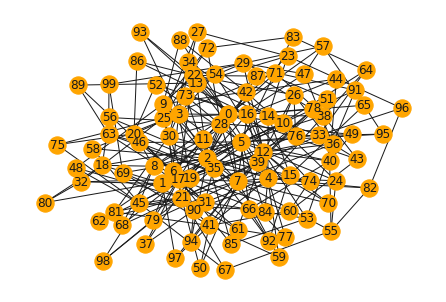

In [362]:
nx.draw(B,pos = nx.spring_layout(B), with_labels=True, node_color = "orange")

Now let's see how the degree centrality distribution looks like. 


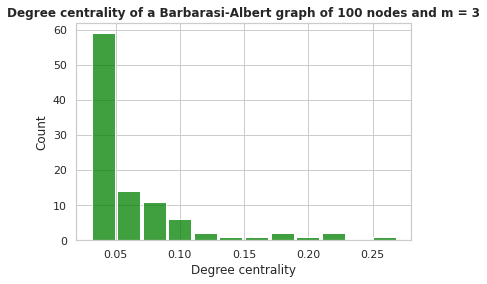

In [242]:
degree_centrality_B = nx.degree_centrality(B)
#plot the degree centrality in a histogram
sns.histplot(degree_centrality_B,  shrink=.9, color = "green", binwidth=0.0199)
plt.xlabel("Degree centrality")
plt.title("Degree centrality of a Barbarasi-Albert graph of 100 nodes and m = 3", weight="bold")
plt.show()

In the histogram, we can see that the distribution of the degree centrality looks like a power distribution.
These particular type of graphs have degree distribution that is a power law of the form $p(k)\sim k^{-3}$. Let's plot that function to check that they are similar.

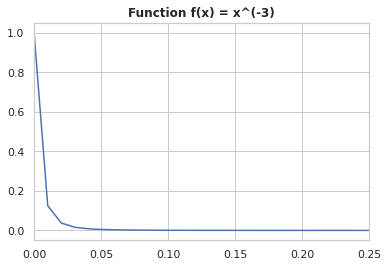

In [344]:
x =  np.linspace(start=0, stop=1, num=99) # create the domain 
y = [i**(-3) for i in range(1, 100)] # function x^(-3)

plt.plot(x, y)
plt.title("Function f(x) = x^(-3)", weight = "bold")
plt.xlim(0, 0.25)
plt.show()

## Conclusion

We could observe that Barabasi-Albert graphs degree centrality distribution is a power law of the form $p(k) \sim k^{-3}$. We could observe that Barabasi-Albert graphs degree centrality distribution is a power law of the form $p(k) \sim k^{-3}$. This property is what makes these networks valuable because many phenomena have this distribution for example distribution of income. 

# Final conclusions

- Observing the **degree centrality distribution** of graphs can give us important information about the topology of the graphs. This is essential when we use random generators to build graphs that are too big to visualize properly. Furthermore finding the degree centrality distribution of a graph allows us to apply mathematical tools that can be helpful to study it. 

- **Erdos-Renyi-graphs and Barbarasi-Albert graphs degree distributions are different.** This is because these types of graphs are built using different algorithms.  While in Erdos-Renyi-graphs each edge has the same probability to be added or not to the graph in Barbarasi-Albert graphs edges are attached to the nodes with high degree.  The main difference between these 2 methods is that in Erdos-Renyi-graphs the probability to add an edge between 2 nodes is independent of all the other edges but in Barbarasi-Albert graphs the probability of linking 2 nodes depends on the degree of one node.

- **Barbarasi-Albert** graphs are an amazing tool to model some real-life problems and phenomena.

- **Erdos-Renyi-graphs** are interesting because some NP-Complete problems are "easy" in these graphs. So if we face an NP-Complete problem but we are only interested in instances that can be modeled as Erdos-Renyi graphs then we can solve it easily. 

## Sources 
- https://networkx.org/documentation/latest/tutorial.html#attributes
-https://networkx.org/documentation/latest/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html
- https://networkx.org/documentation/latest/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html
- https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model
- https://en.wikipedia.org/wiki/Scale-free_network
- https://en.wikipedia.org/wiki/Degree_distribution